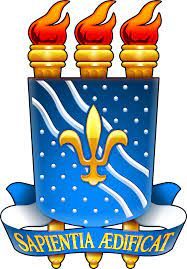

## UNIVERSIDADE FEDERAL DA PARAÍBA
### CENTRO DE TECNOLOGIA
### Programa de Pós-Graduação em Engenharia Civil e Ambiental (PPGECAM)
#### Disciplina: Linguagem de Programação (SECEA0052)
#### Semestre: 2022.1
#### Docente: Prof. Dr. Cristiano Das Neves Almeida

 
####  Aluno: Raul Souza Muniz (20221012261)


In [79]:
%config Completer.use_jedi = False

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
# Abrindo o site pelo selenium
service_obj = Service('C:\selenium\chromedriver.exe')
driver = webdriver.Chrome(service=service_obj)
driver.get("http://ampeq.net/chuva/chuva.php?measure_point=055000000000000003")

In [3]:
# Atribuindo as atualizações e comandos para baixar os dados
sel_dias = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/select') # Encontrando o elemento pelo XPath
sel_dias.send_keys('365')
sel_dias.send_keys(Keys.ENTER)

atualiza = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/input') 
atualiza.send_keys(Keys.ENTER)

In [4]:
# Fazendo o download da tabela com os dados de chuva
dados = driver.find_element(By.XPATH,'//*[@id="foot_div"]/table/tbody')

In [5]:
# Atribuindo o valor para o tipo texto e adicionando o string completo a uma variável
dados_txt = dados.text

In [6]:
# Separando cada valor
lista = dados_txt.split('\n');
li = [];
for elemento in lista:
    li.append(elemento.split(' '))

In [7]:
#Retirando os valores que serão analisados (Datas e a respectiva precipitação)
datas = [];
prec = [];
for x in range(0,len(li)):
    datas.append(li[x][0])
    prec.append(li[x][4])


In [8]:
#Transformando prec em numero do tipo float
prec = (list(map(float, prec)))

In [9]:
# Gerando um DataFrame com os valores extraídos do site
df = pd.DataFrame({'Data' : datas,'Precipitação':prec })

In [26]:
df

,Data,Precipitação
0,2022-06-16,0.0
1,2022-06-16,1.6
2,2022-06-15,0.6
3,2022-06-14,0.0
4,2022-06-13,0.0
...,...,...
181,2021-12-18,0.0
182,2021-12-17,0.0
183,2021-12-16,1.0
184,2021-12-15,0.0


In [10]:
# Organizando os dados
df['Data'].sort_values(ascending=True)

185    2021-12-14
184    2021-12-15
183    2021-12-16
182    2021-12-17
181    2021-12-18
          ...    
4      2022-06-13
3      2022-06-14
2      2022-06-15
1      2022-06-16
0      2022-06-16
Name: Data, Length: 186, dtype: object

In [11]:
#Setando as datas como Índex do df
df['Data'] = pd.to_datetime(df['Data'])
df = pd.DataFrame(df.set_index('Data'))

In [12]:
ind = df.index.sort_values(ascending=True)

In [177]:
# # Traçando o primeiro gráfico com os valores extraídos do site
# df['Precipitação'].sort_index().plot.bar(title='Precipitação do Pluviometro de Tambauzinho', figsize=(20,10)).grid()

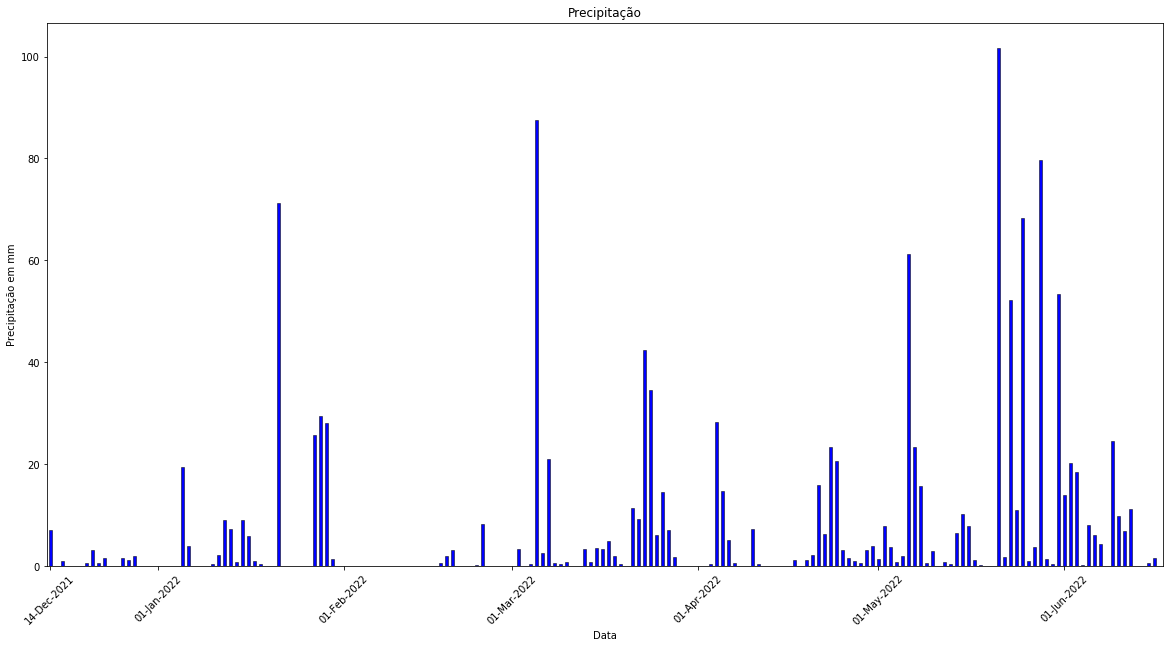

In [69]:
# Traçando o Gráfico

axs = df.sort_index().plot.bar(subplots=True, layout=(1,1), figsize=(20,10),
                  sharex=False, legend=False, color='blue', edgecolor = 'k', linewidth = 0.5)

# Traçando os valores das posições desejadas(uma posição para cada mês) no vetor por meio do laço for
count = 0;
pos = [];
for posicao in ind:
    if (ind[count].month != ind[count-1].month):
        pos.append(count)
    count = count+1;

# Buscando o label das posições conseguidas no for anterior
count = 0;
aux = [];
labels_t = [];
for x in ind:
    if (ind[count].month != ind[count-1].month):
        aux = x.strftime('%d-%b-%Y')
        labels_t.append(aux)
    count = count+1;

# Inserindo as posições e os labels no gráfico
for ax in axs.flat:
    ax.set_ylabel(ax.get_title()+ ' em mm')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels_t, rotation=45, ha='center')

In [160]:
# Desenvolvendo a primeira função, englobando todos os procedimentos realizados


pasta = 'C:\selenium\chromedriver.exe'

def prec_tambauzinho(Qnt_Dias, pasta):
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.keys import Keys
    import time
    import pandas as pd
    
    # Abrindo o site pelo selenium
    service_obj = Service(pasta)
    driver = webdriver.Chrome(service=service_obj)
    driver.get("http://ampeq.net/chuva/chuva.php?measure_point=055000000000000003")

    # Atribuindo as atualizações e comandos para baixar os dados
    sel_dias = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/select') # Encontrando o elemento pelo XPath
    sel_dias.send_keys(str(Qnt_Dias))
    sel_dias.send_keys(Keys.ENTER)

    atualiza = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/input') 
    atualiza.send_keys(Keys.ENTER)

    # Fazendo o download da tabela com os dados de chuva
    dados = driver.find_element(By.XPATH,'//*[@id="foot_div"]/table/tbody')

    # Atribuindo o valor para o tipo texto e adicionando o string completo a uma variável
    dados_txt = dados.text

    # Separando cada valor
    lista = dados_txt.split('\n');
    li = [];
    for elemento in lista:
        li.append(elemento.split(' '))

    #Retirando os valores que serão analisados (Datas e a respectiva precipitação)
    datas = [];
    prec = [];
    for x in range(0,len(li)):
        datas.append(li[x][0])
        prec.append(li[x][4])

    #Transformando prec em numero do tipo float
    prec = (list(map(float, prec)))

    # Gerando um DataFrame com os valores extraídos do site
    df = pd.DataFrame({'Data' : datas,'Precipitação':prec })

    #Setando as datas como Índex do df
    df['Data'] = pd.to_datetime(df['Data'])
    df = pd.DataFrame(df.set_index('Data'))
    ind = df.index.sort_values(ascending=True)

    #Plotando o Gráfico
    axs = df.sort_index().plot.bar(subplots=True, layout=(1,1), figsize=(20,10),
                      sharex=False, legend=False, color='blue', edgecolor = 'k', linewidth = 0.5)
    
     # Traçando os valores das posições desejadas(uma posição para cada mês) no vetor por meio do laço for
    cont = 0;
    pos = [];
    for posicao in ind:
        if (ind[cont].month != ind[cont-1].month):
            pos.append(cont)
        cont = cont+1;

    # Buscando o label das posições conseguidas no for anterior
    count = 0;
    aux = [];
    labels_t = [];
    for x in ind:
        if (ind[count].month != ind[count-1].month):
            aux = x.strftime('%d-%b-%Y')
            labels_t.append(aux)
        count = count+1;
    
    # Inserindo as posições e os labels no gráfico
    
    for ax in axs.flat:
        ax.set_ylabel(ax.get_title()+ ' em mm')
        ax.set_xticks(pos)
        ax.set_xticklabels(labels_t, rotation=45, ha='center')
        ax.grid()

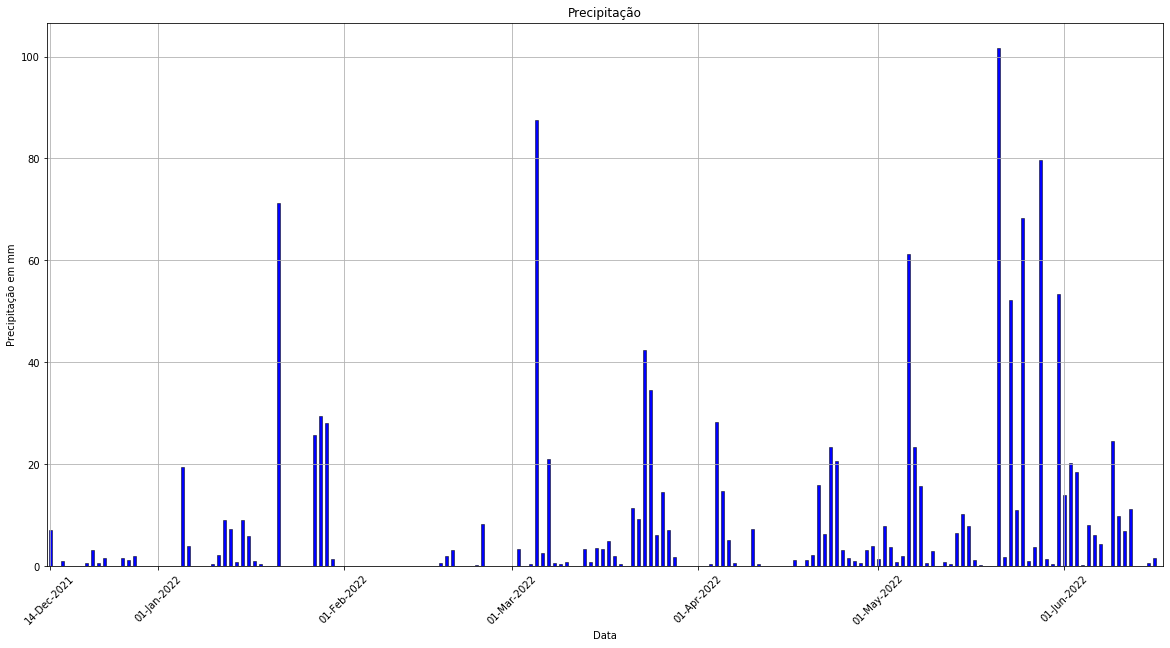

In [178]:
# Rodando a função
prec_tambauzinho(360,pasta)

A execução da função levou: 0:00:14 segundos para ser realizada


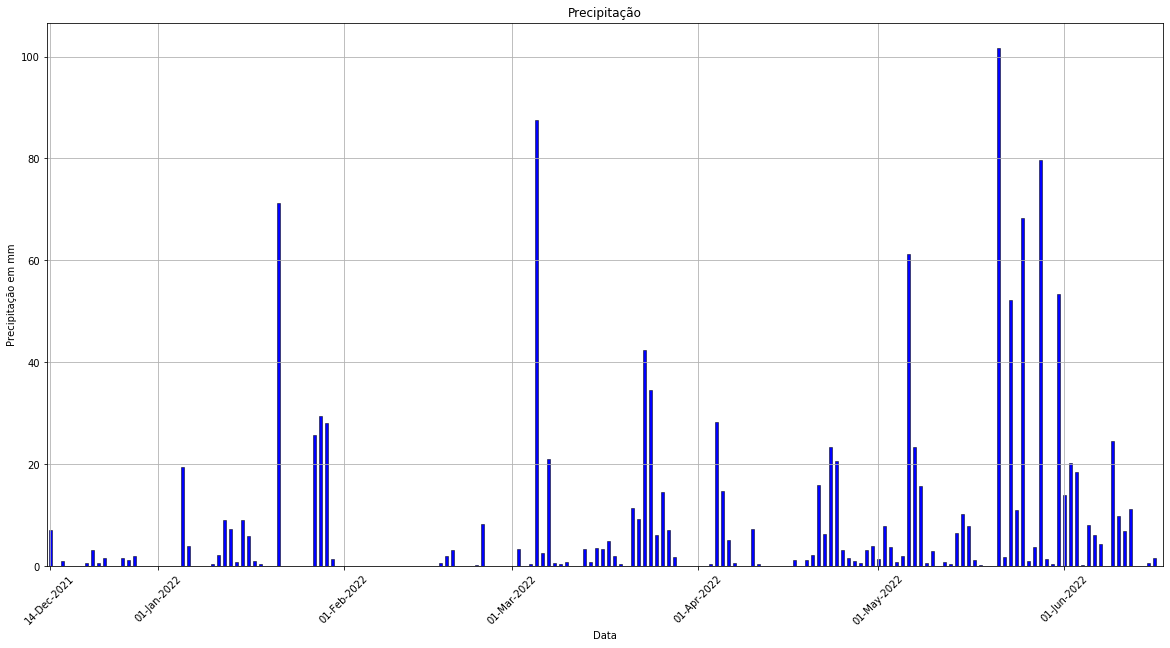

In [179]:
# Vamos agora analisar quanto tempo nossa função está levando para realziar todos os procedimentos
from datetime import timedelta

start_time = time.time()

prec_tambauzinho(360,pasta)

elapsed_time_secs = time.time() - start_time

msg = "A execução da função levou: %s segundos para ser realizada" % timedelta(seconds=round(elapsed_time_secs))

print(msg)   

## Faremos agora, uma avaliação da precipitação mensal acumulada

In [14]:
df_mensal = df.resample('M').sum()

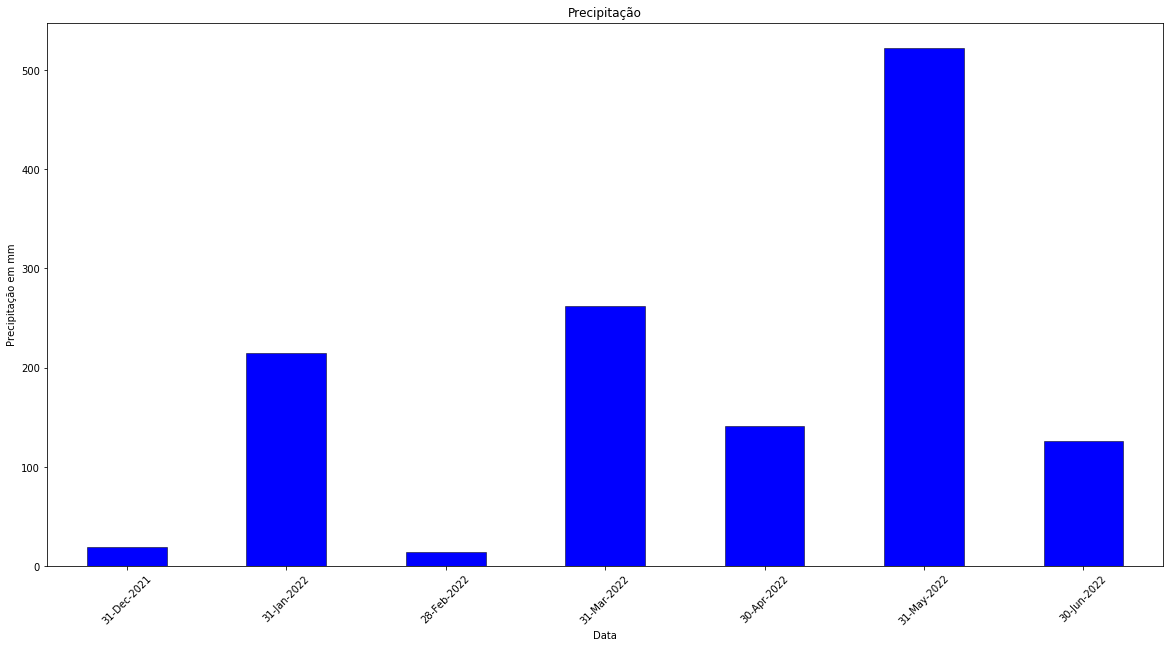

In [131]:
ind = df_mensal.index.sort_values(ascending=True)

axs = df_mensal.sort_index().plot.bar(subplots=True, layout=(1,1), figsize=(20,10),
                  sharex=False, legend=False, color='blue', edgecolor = 'k', linewidth = 0.5)

# Traçando os valores das posições desejadas(uma posição para cada mês) no vetor por meio do laço for
count = 0;
pos = [];
for posicao in ind:
    if (ind[count].month != ind[count-1].month):
        pos.append(count)
    count = count+1;

# Buscando o label das posições conseguidas no for anterior
count = 0;
aux = [];
labels_t = [];
for x in ind:
    if (ind[count].month != ind[count-1].month):
        aux = x.strftime('%d-%b-%Y')
        labels_t.append(aux)
    count = count+1;

# Inserindo as posições e os labels no gráfico
for ax in axs.flat:
    ax.set_ylabel(ax.get_title()+ ' em mm')
    ax.set_xticks(pos)
    ax.set_xticklabels(labels_t, rotation=45, ha='center')

In [154]:
# Transformaremos a função construida em outra mais completa, em que o usuário poderá escolher se quer os gráficos mensais ou diários

pasta = 'C:\selenium\chromedriver.exe'

# Qnt_Dias = Quantidade de dias estudados
# pasta: Diretório onde está localizado o driver
# tip_ana: se a análise é diária ou mensal


def prec_tambauzinho_final(Qnt_Dias, pasta,tip_ana):
    if (tip_ana != 'mensal') and (tip_ana != 'diario'):
        print("Por favor, digite um valor válido para o  tipo de análise desejado (tip_ana) ---- 'mensal' ou ' diario'")
    else:
        from selenium import webdriver
        from selenium.webdriver.chrome.service import Service
        from selenium.webdriver.common.by import By
        from selenium.webdriver.common.keys import Keys
        import time
        import pandas as pd
        # Abrindo o site pelo selenium
        service_obj = Service(pasta)
        driver = webdriver.Chrome(service=service_obj)
        driver.get("http://ampeq.net/chuva/chuva.php?measure_point=055000000000000003")

        # Atribuindo as atualizações e comandos para baixar os dados
        sel_dias = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/select') # Encontrando o elemento pelo XPath
        sel_dias.send_keys(str(Qnt_Dias))
        sel_dias.send_keys(Keys.ENTER)

        atualiza = driver.find_element(By.XPATH,'//*[@id="titel_div"]/form/h3/input') 
        atualiza.send_keys(Keys.ENTER)

        # Fazendo o download da tabela com os dados de chuva
        dados = driver.find_element(By.XPATH,'//*[@id="foot_div"]/table/tbody')

        # Atribuindo o valor para o tipo texto e adicionando o string completo a uma variável
        dados_txt = dados.text

        # Separando cada valor
        lista = dados_txt.split('\n');
        li = [];
        for elemento in lista:
            li.append(elemento.split(' '))

        #Retirando os valores que serão analisados (Datas e a respectiva precipitação)
        datas = [];
        prec = [];
        for x in range(0,len(li)):
            datas.append(li[x][0])
            prec.append(li[x][4])

        #Transformando prec em numero do tipo float
        prec = (list(map(float, prec)))

        # Gerando um DataFrame com os valores extraídos do site
        df = pd.DataFrame({'Data' : datas,'Precipitação':prec })

        #Setando as datas como Índex do df
        df['Data'] = pd.to_datetime(df['Data'])
        df = pd.DataFrame(df.set_index('Data'))
        df_mensal = df.resample('M').sum()

        if tip_ana == 'mensal':
                  df = df_mensal
               
        ind = df.index.sort_values(ascending=True)

        #Plotando o Gráfico
        axs = df.sort_index().plot.bar(subplots=True, layout=(1,1), figsize=(20,10),
                          sharex=False, legend=False, color='blue', edgecolor = 'k', linewidth = 0.5)

         # Traçando os valores das posições desejadas(uma posição para cada mês) no vetor por meio do laço for
        cont = 0;
        pos = [];
        for posicao in ind:
            if (ind[cont].month != ind[cont-1].month):
                pos.append(cont)
            cont = cont+1;

        # Buscando o label das posições conseguidas no for anterior
        count = 0;
        aux = [];
        labels_t = [];
        for x in ind:
            if (ind[count].month != ind[count-1].month):
                aux = x.strftime('%d-%b-%Y')
                labels_t.append(aux)
            count = count+1;

        # Inserindo as posições e os labels no gráfico

        for ax in axs.flat:
            ax.set_ylabel(ax.get_title()+ ' em mm')
            ax.set_xticks(pos)
            ax.set_xticklabels(labels_t, rotation=45, ha='center')
            ax.grid()

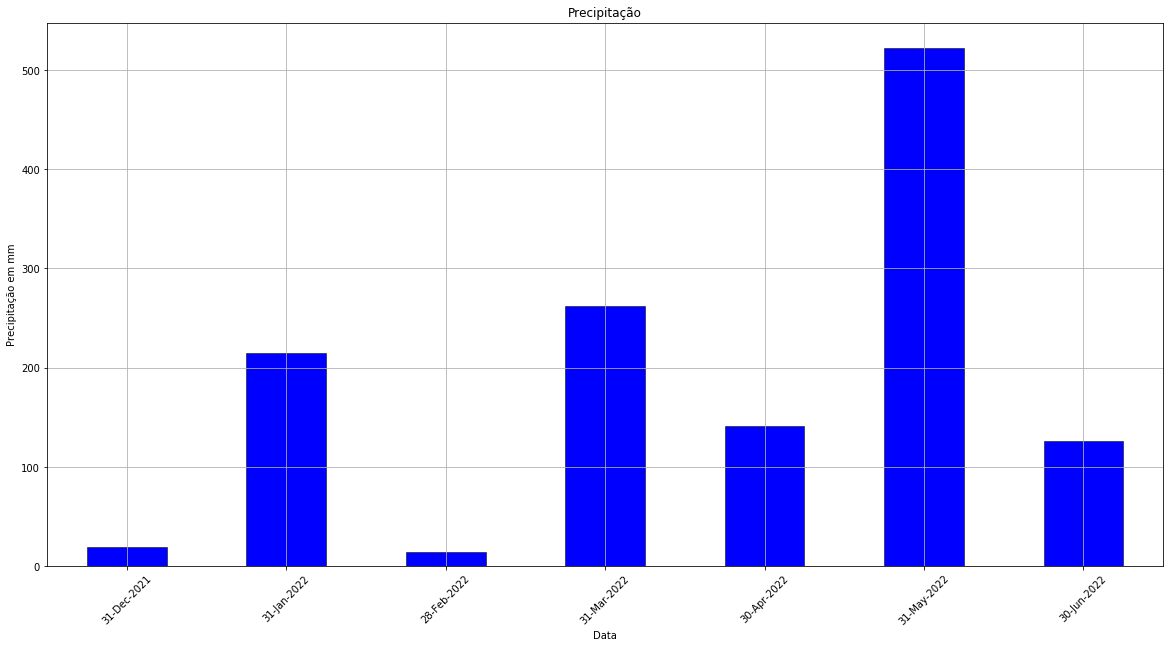

In [155]:
prec_tambauzinho_final(360, pasta,'mensal')

### Analisando os tempos de execuções em cada função construída

A execução da função levou: 0:00:13 segundos para ser realizada


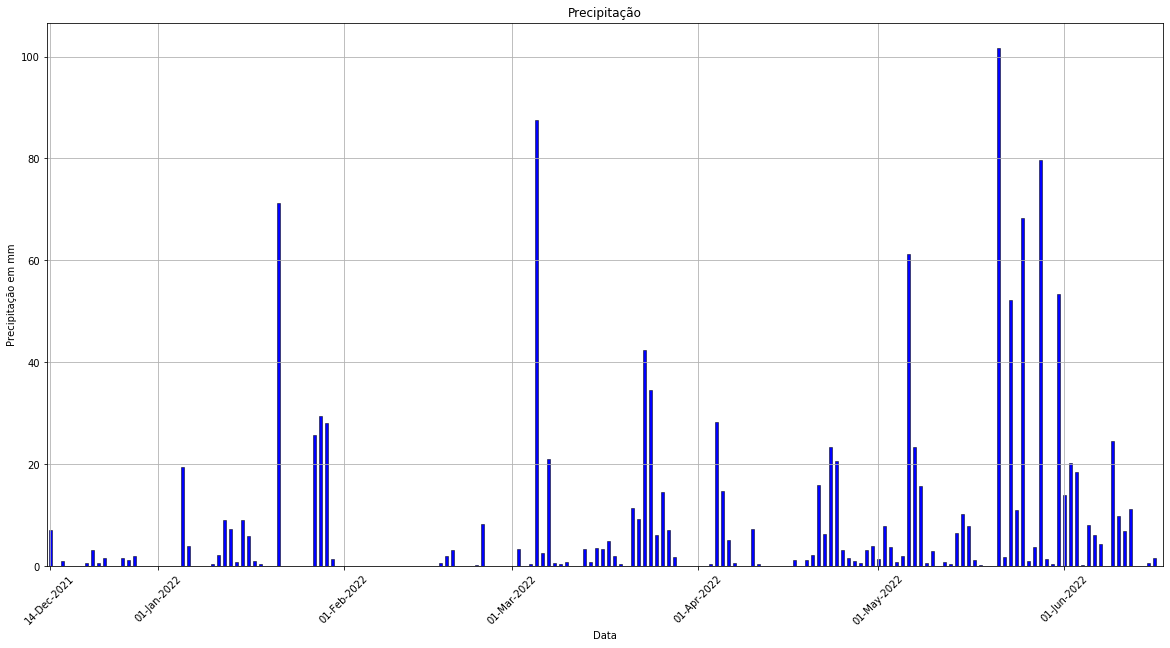

In [181]:
# Vamos analisar se houve diferença no tempo de processamento quando escolhemos o mensal na função completa x quando rodamos a função inicial

start_time = time.time()

prec_tambauzinho(360,pasta)

elapsed_time_secs = time.time() - start_time

msg = "A execução da função levou: %s segundos para ser realizada" % timedelta(seconds=round(elapsed_time_secs))

print(msg)   

A execução da função levou: 0:00:13 segundos para ser realizada


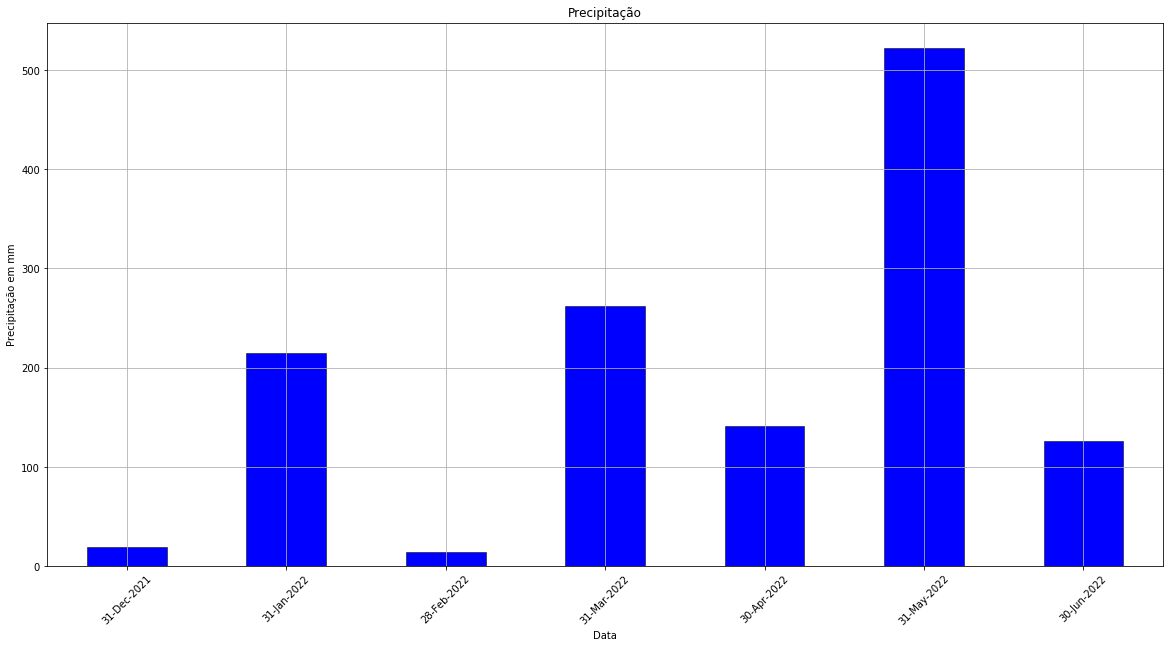

In [157]:
# Vamos analisar se houve diferença no tempo de processamento quando escolhemos o mensal na função completa x quando rodamos a função inicial

start_time = time.time()

prec_tambauzinho_final(360,pasta,'mensal')

elapsed_time_secs = time.time() - start_time

msg = "A execução da função levou: %s segundos para ser realizada" % timedelta(seconds=round(elapsed_time_secs))

print(msg)   

Tempo de duração do processo em nanosegundos: 78125000


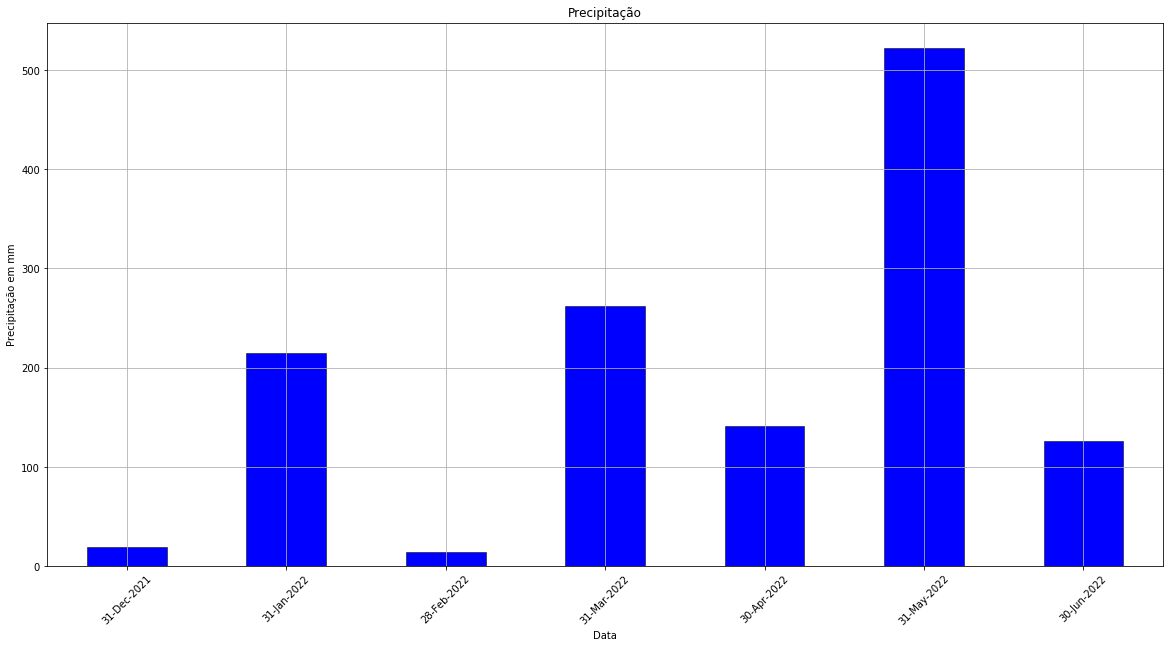

In [186]:
#Como em segundos não houve diferença vamos analisar em nanosegundos


# Valor do tempo da função analisando os valores mensais com a função final
start = time.process_time_ns() 
prec_tambauzinho_final(360,pasta,'mensal')
end = time.process_time_ns() 
delta_1 = end - start;
print("Tempo de duração do processo em nanosegundos:", delta_1)

Tempo de duração do processo em nanosegundos: 390625000


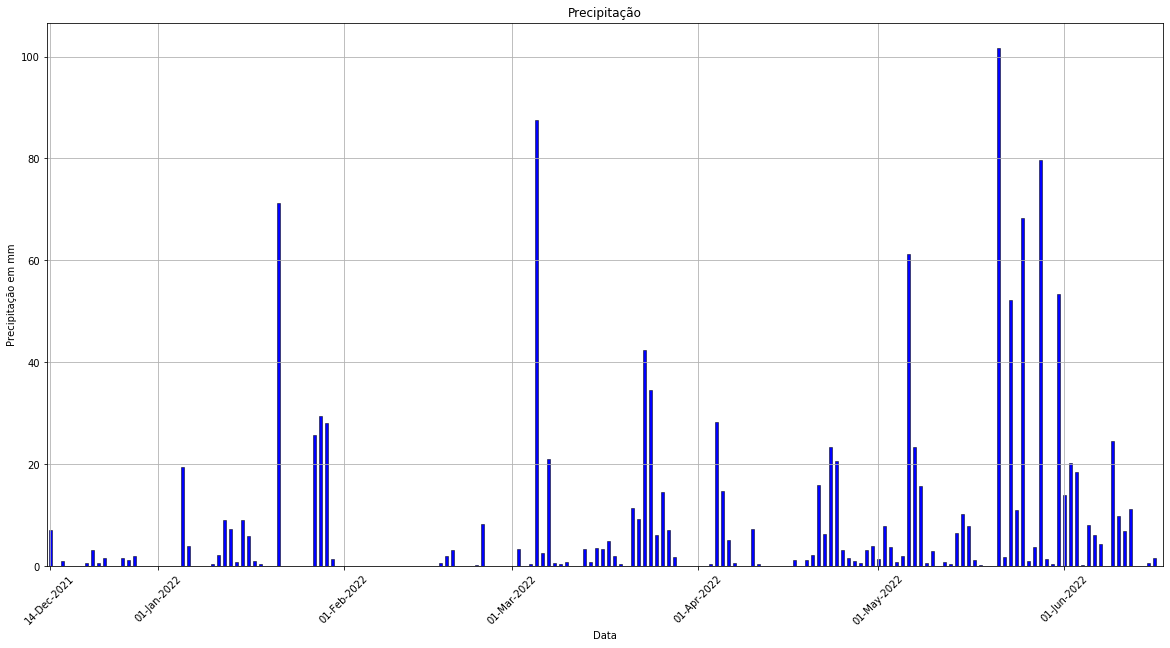

In [182]:
# Segund aanalise
start = time.process_time_ns() 
prec_tambauzinho(360,pasta)
end = time.process_time_ns() 
delta_2 = end - start;
print("Tempo de duração do processo em nanosegundos:", end - start)

In [187]:
# Comparando os dois
compara = [delta_1,delta_2]
min(compara)

# Função final é mais rápida, possívelment pelo fato da plotagem do gráfico levar mais tempo nos dados diarios do que nos mensais
# Percebe-se que quando atribuido a característica de analise diaria na função completa ela leva mais tempo, devido sua maior complexidade

78125000

## Analisando estatisticamente os valores

In [175]:
# Valores diários
df.describe()

,Precipitação
count,186.000000
mean,6.989247
std,15.955760
min,0.000000
25%,0.000000
50%,0.800000
75%,6.200000
max,101.600000


In [176]:
#Valores mensais acumulados
df_mensal.describe()

,Precipitação
count,7.000000
mean,185.714286
std,174.423579
min,14.200000
25%,72.400000
50%,141.400000
75%,238.900000
max,521.800000


### Analisando outros tipos de gráficos para os dados obtidos

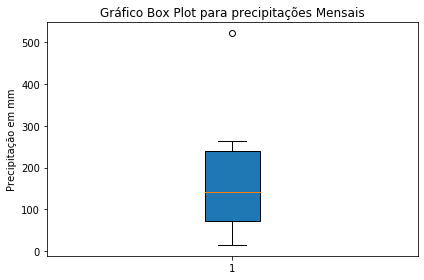

In [214]:
#Box Plot para os dados mensais acumulados

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitações Mensais")
ax_2.boxplot(df_mensal['Precipitação'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

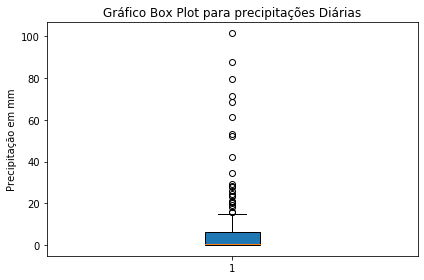

In [203]:
#Box Plot para os dados diários

fig, ax_2 = plt.subplots()
ax_2.set_title("Gráfico Box Plot para precipitações Diárias")
ax_2.boxplot(df['Precipitação'], patch_artist=True)
ax_2.set_ylabel("Precipitação em mm")
plt.tight_layout()
plt.show()

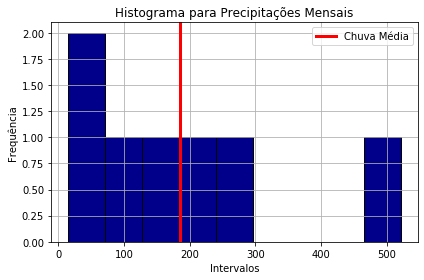

In [213]:
# Histograma Prec Mensal
fig, ax_3 = plt.subplots()
ax_3.hist(df_mensal['Precipitação'], bins = 9, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para Precipitações Mensais")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df_mensal['Precipitação'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


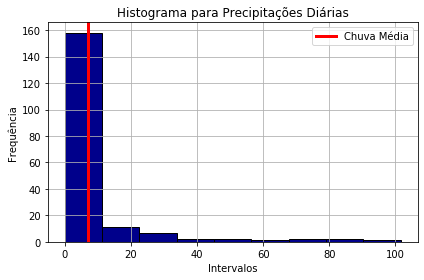

In [216]:
# Histograma Prec Diária
fig, ax_3 = plt.subplots()
ax_3.hist(df['Precipitação'], bins = 9, edgecolor = 'k', color = 'darkblue' )
ax_3.set_title("Histograma para Precipitações Diárias")
ax_3.set_xlabel("Intervalos")
ax_3.set_ylabel("Frequência")
plt.axvline(df['Precipitação'].mean(), color='red', label='Chuva Média', linewidth=3)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

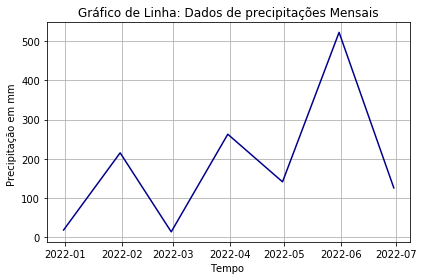

In [217]:
#Gráfico de Linha Dados mensais

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df_mensal['Precipitação'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados de precipitações Mensais")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

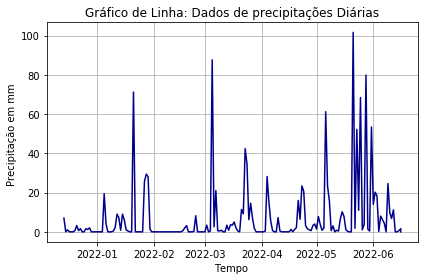

In [218]:
# Gráficos de Linha dados diários

fig = plt.figure() 
fig, ax = plt.subplots()
ax.plot(df['Precipitação'],color='darkblue')
ax.set_title("Gráfico de Linha: Dados de precipitações Diárias")
ax.set_xlabel("Tempo ")
ax.set_ylabel("Precipitação em mm ")
plt.grid(True)
plt.tight_layout()
plt.show()